# Практическая работа №2: Исследование задач о раскрасках

Кодуков А.В. 9382, в. 75

## Цель работы

Формирование представления о задачах о раскрасках, выработать умение использование леммы Бёрнсайда для решения задачи о раскрасках, привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

## Основные теоретические положения

### Действие группы на множество

Пусть $G$ - группа, $X$ - множество. Говорят, что $G$ действует на $X$, если задана операция $G \times X \to X$, обладающая следующими свойствами:

$\forall x \in X$ и $\forall g,h \in G$
1) $g(hx) = (gh)x$

2) $ex = x$

### Орбиты и неподвижные точки

Орбитой $x \in X$ под действием $G$ называется множество из элементов, в которые переходят $x$ под действием $G$.
$Gx = \{gx | g \in G\}$.

Длина орбиты - количество элементов в орбите. Любые две орбиты либо не пересекаются, либо совпадают.

Множество неподвижных точек элемента $g \in G$ - это такие $x \in X$, которые под действием элемента не изменяются.
$X^g = \{x\in X | gx = x\}$

### Лемма Бёрнсайда

Количество орбит действия группы $G$ на множестве $X$:
$N = \frac{1}{|G|}\sum_{g \in G} |X^{g}|$

### Раскраски

Пусть $I$ - произвольное множество, $C$ - множество цветов. Раскраской $I$ называется отображение $I$ в $C$. Множество всех раскрасок обозначим как $C^I$.

Количество раскрасок из $C^{I}$, не меняющиеся под действием $g \in G$ равно $|C|^{c(\varphi(g))}$, где:
$c(\varphi(g))$ - количество независимых циклов в перестановке $\varphi(g)$ (включая циклы длины 1).

## Постановка задачи

Аналитически решить задачу о раскрасках; графически отобразить решения задачи с использованием системы компьютерной алгебры SageMath. Полученные результаты содержательно проинтерпретировать.

## Условие задачи

Плоскость разбита на одинаковые правильные треугольники со стороной единица. Одна из вершин одного из треугольников обозначена через $A$. Пусть $X$ - множество всех вершин, которые удалены от $A$ на расстояние не больше, чем 4. Каждую отчку из $X$ Красят в один из 3 цветов. Сколькими способами можно сосавить такую раскраску (с точностью до поворотов и осевых симметрий плоскости)?

## Порядок выполнения работы

1) Аналитически решить задачу о раскрасках для заданного варианта. Все умозаключения в ходе решения обосновать и содержательно проинтерпретировать.

2) Реализовать средствами SageMath функцию, отображающую графически раскраску по заданному номеру. Продемонстрировать работу функции на нескольких примерах. Сделать выводы.

3) Дополнительное необязательное задание: для заданного варианта решить задачу в общем виде.

## Аналитическое решение



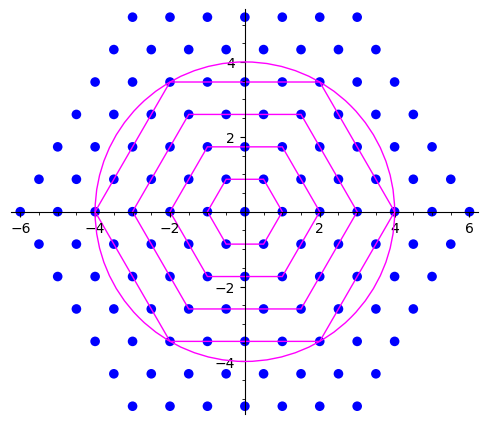

In [11]:
import random

colorsAmount = 4; dist = 6; hueStart = 0.5; hueMult = 0.175; pointSize = 48
#точка - список вида [x-координата, y-координата, цвет]

def draw_picture(pointsList):
    G = Graphics()
    points = point([])
    for r in range(1, 5):
        L = [[r * cos(pi*i/3), r * sin(pi*i/3)] for i in range(6)]
        P = polygon2d(L, fill = false, rgbcolor=(1,0,1))
        G += P
    for p in pointsList:
        points += point([[p[0],p[1]]], size=pointSize)
    G += points
    G += circle([0,0],4, rgbcolor=(1,0,1))
    G.show(figsize=[5,5])
    #return G
        

def make_points_list(colorOption="circle"):
    pointsList = []
    
    for x in srange(-dist, dist+1):
        for y in srange(-dist, dist+1):
            xx = x if y % 2 == 0 else x + 0.5
            yy = y * sqrt(3)/2
            if sqrt(xx*xx + yy*yy) <= abs(dist):
                pointsList.append([xx,yy,0])
            
    return pointsList
    
    
pointsList = make_points_list(colorOption="circle")
draw_picture(pointsList)

Внутри окружности радиусом 4 можно выделить 4 кольца, которые охватывают все необходимые точки. Рассмотрим задачу раскрасок для таких колец. 

Пусть нам дано множество цветов $\{a,b,c\}$ и подмножества вершин:

1 подмножество: {$x_1$,$x_2$,...,$x_{6}$} $\forall i\  x_i \in \{a,b,c\}$

2 подмножество: {$x_1$,$x_2$,...,$x_{12}$} $\forall i\  x_i \in \{a,b,c\}$

3 подмножество: {$x_1$,$x_2$,...,$x_{18}$} $\forall i\  x_i \in \{a,b,c\}$

4 подмножество: {$x_1$,$x_2$,...,$x_{24}$} $\forall i\  x_i \in \{a,b,c\}$

Всего количество вершин $60$. Существует всего $3^{60}$ таких раскрасок, но не все из них соответствуют различным кольцам.

На множестве $X$ всех раскрасок действует группа поворотов и осевых симметрий. Операцией в этой группе является композиция. Операция является ассоциативной, нейтральный элемент - тождественное отображение, обратным к осевой симметрии является она сама, обратным к повроту - поворот в обратную сторону. Обозначим группу буквой $G$.

Задано отображение из $G$ в симметрическую группу $S_{60}$. Пусть $\tau$ - поворот, переводящий каждое место в следующее, а $\sigma$ - осевая симметрия.

Выпишем некоторые перестановки из $S_{60}$, в которые переходят элементы группы $G$, для каждого подмножества:

Подсчет е
1 подмножество:

$e =  \begin{pmatrix}
  1, 2, 3, ...,6\\
  1, 2, 3, ...,6
 \end{pmatrix} = (1,2,4,5,6)$

2 подмножество:

$e =  \begin{pmatrix}
  1, 2, 3, ..., 11, 12\\
  1, 2, 3, ..., 11, 12
 \end{pmatrix} = (1, 2, ..., 11, 12)$

3 подмножество:

$e =  \begin{pmatrix}
  1, 2, 3, ..., 17, 18\\
  1, 2, 3, ..., 17, 18
 \end{pmatrix} = (1, 2, ..., 17, 18)$

4 подмножество:

$e =  \begin{pmatrix}
  1, 2, 3, ..., 23, 24\\
  1, 2, 3, ..., 23, 24
 \end{pmatrix} = (1, 2, ..., 23, 24)$

Подсчет поворотов
1 подмножество:

$\tau = \begin{pmatrix}
  1, 2,3,4,5,6\\
  2, 3, 4, 5,6,1
 \end{pmatrix}$

2 подмножество:

$\tau =  \begin{pmatrix}
  1, 2,..., 11, 12\\
  3, 4, ...,1, 2
 \end{pmatrix}$

3 подмножество:

$\tau =  \begin{pmatrix}
  1, 2,..., 17, 18\\
  4,5,...,2,3
 \end{pmatrix}$

4 подмножество:

$\tau =  \begin{pmatrix}
  1, 2,..., 23, 24\\
  5,6,..., 3,4
 \end{pmatrix}$

Подсчет осевых поворотов
1 подмножество:

$\sigma = \begin{pmatrix}
  1, 2,3,4,5,6\\
  6,5,4,3,2,1
 \end{pmatrix}$, 3 цикла

2 подмножество:

$\sigma =  \begin{pmatrix}
  1, 2,..., 11, 12\\
  12,11,...,2,1
 \end{pmatrix}$, 6 циклов

3 подмножество:

$\sigma =  \begin{pmatrix}
  1, 2,..., 17, 18\\
  18,17,...,2,1
 \end{pmatrix}$, 9 циклов

4 подмножество:

$\sigma =  \begin{pmatrix}
  1, 2,..., 23, 24\\
  24,23,...,2,1
 \end{pmatrix}$, 12 циклов

Перестановка $\tau$ является циклом длины 6, исходя из Леммы 2 можно посчитать количество циклов в перестановке $\tau^i\ \forall i$. Число 6 раскладывается на простые множители как 6 = 2*3. Каждая перестановка $\tau^i$ является произведением d независимых циклов, где d:= НОД(6,i).

$\forall i\$ не кратных 2 или 3: d = 1

$\forall i\$ кратных 2 но не кратных 3: d = 2

В остальных случаях d = 3

$\#X^e = 3^{60}$

$\# X^{\tau^k} = 3$ , $\forall k \in \{1,5\}$

$\# X^{\tau^u} = 3^2$, $\forall u \in \{2,4\}$

$\# X^{\tau^z} = 3^{3}$, z = 3 (1 значение)

1 подмножество:

$\sigma \tau = \begin{pmatrix}
  1, 2,3,4,5,6\\
  1,6,5,4,3,2,1
 \end{pmatrix} = (1)(4)(2,6)(3,5)$, 4 цикла

2 подмножество:

$\sigma \tau = \begin{pmatrix}
  1, 2,3,...,10,11,12\\
  12,11,10,...,3,2,1
 \end{pmatrix} = \begin{pmatrix}
  1, 2,3,...,10,11,12\\
  2,1,12,...,5,4,3
 \end{pmatrix} = (1,2)(3,12)(4,11)(5,10)(6,9)(7,8)$, 6 циклов

3 подмножество:

$\sigma \tau = \begin{pmatrix}
  1, 2,3,4,...,16,17,18\\
  3,2,1,18,...,6,5,4
 \end{pmatrix} = (1,3)(2)(4,18)(5,17)(6,16)(7,15)(8,14)(9,13)(10,12)(11)$, 10 циклов

Для $\sigma \tau^i$ при $i$ - нечетных, количество циклов у 1, 3, 5 подмножеств увеличивается на 1 (основываясь на значениях осевых поворотов и значений выше). Поэтому далее для подмножеств 4 и 5 будет 12 и 16 циклов соотвественно.

1 подмножество:

$\sigma \tau^2 = \begin{pmatrix}
  1, 2,3,4,5,6\\
  2,1,6,5,4,3
 \end{pmatrix} = (1,2)(3,6)(4,5)$, 3 цикла

2 подмножество:

$\sigma \tau^2 = \begin{pmatrix}
  1, 2,3,...,10,11,12\\
  4,3,2,...,7,6,5
 \end{pmatrix} = (1,4)(2,3)(5,12)(6,11)(7,10)(8,9)$, 6 циклов

1 подмножество:

$\sigma \tau^5 = \begin{pmatrix}
  1, 2,3,4,5,6\\
  5,4,3,2,1,6
 \end{pmatrix} = (1,5)(2,4)(3)(6)$, 4 цикла

$\#\sigma = 5^{3+6+9+12+15}$ (1 значение)

$\#\sigma \tau^m = 5^{3+6+9+12+15}$, $m$ - четный, $m \in \{1,...,5\}$ (2 значения)

$\#\sigma \tau^n = 5^{4+6+10+12+16}$, $n$ - нечетный, $n \in \{1,...,5\}$ (3 значения)

Объединим все расчеты и вычислим количество различных бус
$\#X^e = 3^{60}$

$\# X^{\tau^k} = 3$ , $\forall k \in \{1,5\}$

$\# X^{\tau^u} = 3^2$, $\forall u \in \{2,4\}$

$\# X^{\tau^z} = 3^{3}$, z = 3

$\#\sigma = 3^{3+6+9+12}$

$\#\sigma \tau^m = 3^{3+6+9+12}$, $m$ - четный, $m \in \{2,4\}$

$\#\sigma \tau^n = 3^{4+6+10+12}$, $m$ - нечетный, $n \in \{1,3,5\}$

$G = 1 + 2 + 2 + 1 + 1 + 2 + 3 = 12$

Согласно лемме Бернсайда количество различных колец равно:

$\frac{1}{12}(3^{60} + 5\cdot 2 + 3^2 \cdot 2 + 3^3 + 3^{30} \cdot 2 + 3^{32} \cdot 3 + 3^{30})$

   ## Графическое представление преобразований

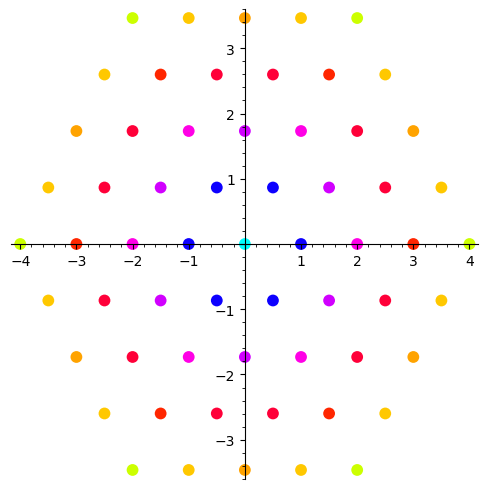

In [32]:
import random

colorsAmount = 4; dist = 6; hueStart = 0.5; hueMult = 0.175; pointSize = 48
#точка - список вида [x-координата, y-координата, цвет]


def make_point_color(x, y, option="circle"):
    if option == "random":
        return random.randint(1, colorsAmount)
    if option == "circle":
        return sqrt(x*x+y*y)
    return 0


def draw_picture(pointsList):
    G = Graphics()
    points = point([])
    for p in pointsList:
        points += point([[p[0],p[1]]], hue=(hueStart + hueMult*p[2]), size=pointSize)
    G += points
    G.show(figsize=[5,5])
        

def make_points_list(colorOption="circle"):
    pointsList = []
    
    for x in srange(-dist, dist+1):
        for y in srange(-dist, dist+1):
            xx = x if y%2==0 else x+0.5
            yy = y * sqrt(3)/2
            if sqrt(xx*xx + yy*yy) <= abs(dist):
                col = make_point_color(xx, yy, colorOption)
                pointsList.append([xx,yy,col])
            
    return pointsList
    
dist = 4
pointSize = 72
pointsList = make_points_list(colorOption="circle")
picture = draw_picture(pointsList)

def rotated(pointsList):
    alpha = -pi/3 # по часовой стрелке на 60 градусов
    rotatedPointsList = []
    
    for p in pointsList:
        x = p[0]*cos(alpha) - p[1]*sin(alpha)
        y = p[0]*sin(alpha) + p[1]*cos(alpha)
        rotatedPointsList.append([x,y,p[2]])
    
    return rotatedPointsList


def reflected(pointsList):
    reflectedPointsList = []
    
    for p in pointsList:
        x = p[0]
        y = -p[1] # отражение относительно горизонтали
        reflectedPointsList.append([x,y,p[2]])
        
    return reflectedPointsList

    print("Симметрии рандомно раскрашенного множества:")
    pointsList = make_points_list(colorOption="random")

Тождественное преобразование:


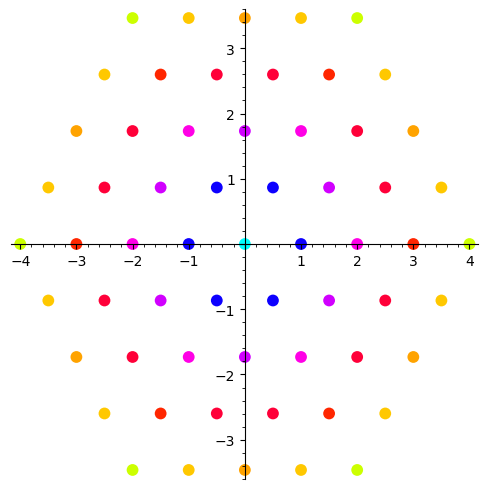

In [22]:
print("Тождественное преобразование:")
draw_picture(pointsList)

Поворот на 60 градусов:


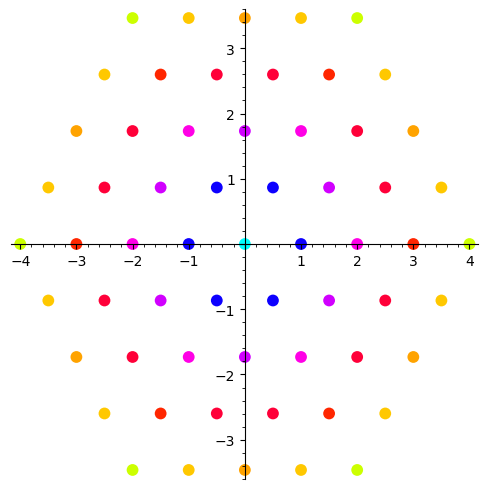

In [24]:
 print("Поворот на 60 градусов:")
draw_picture(rotated(pointsList))

Поворот на 120 градусов:


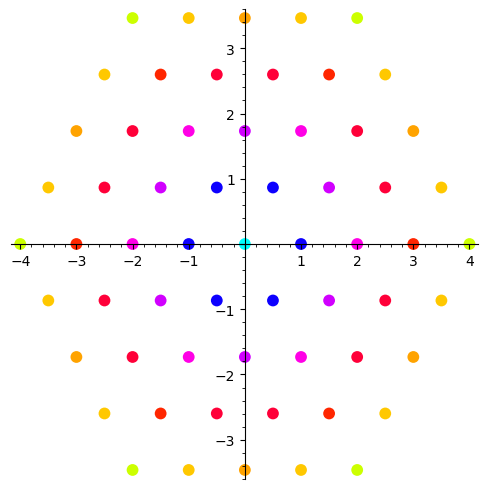

In [25]:
print("Поворот на 120 градусов:")
draw_picture(rotated(rotated(pointsList)))

Поворот на 180 градусов:


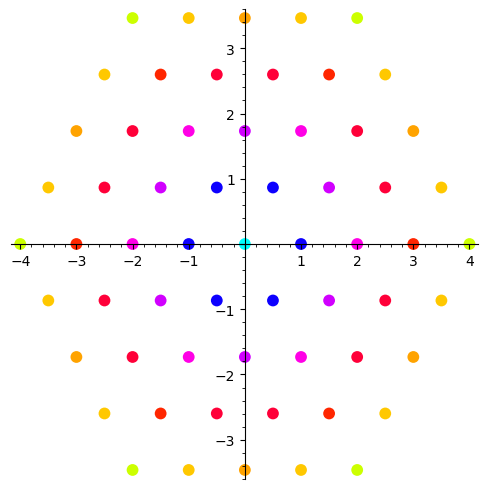

In [26]:
print("Поворот на 180 градусов:")
draw_picture(rotated(rotated(rotated(pointsList))))

Поворот на 300 градусов:


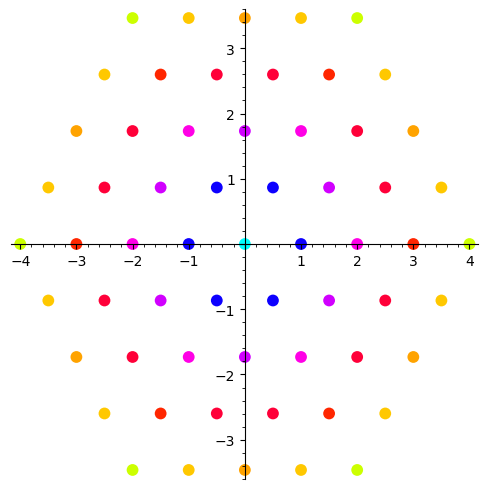

In [27]:
print("Поворот на 300 градусов:")
draw_picture(rotated(rotated(rotated(rotated(rotated(pointsList))))))

Отражение относительно горизонтальной оси:


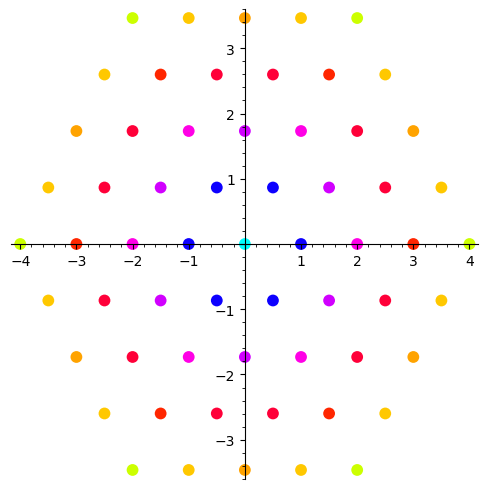

In [28]:
print("Отражение относительно горизонтальной оси:")
draw_picture(reflected(pointsList))

Отражение относительно вертикальной оси:


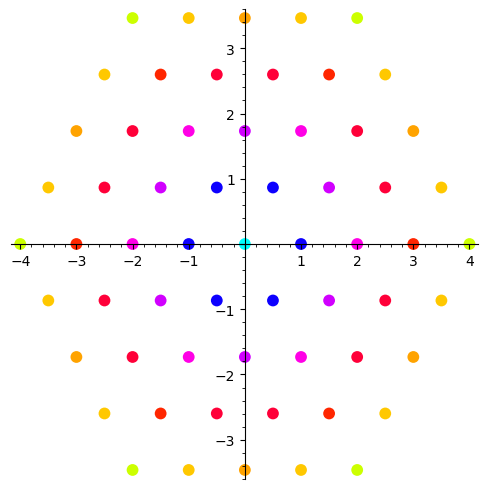

In [29]:
print("Отражение относительно вертикальной оси:")
draw_picture(rotated(rotated(rotated(reflected(pointsList)))))

# Вывод

Были изучены элементы теории групп, в частности действия групп на множествах. Была применена лемма Бернсайда для установления количества различных раскрасок заданного множества.Реализованы процедуры перестановок, процедуры, отображающие графически раскраску.